In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


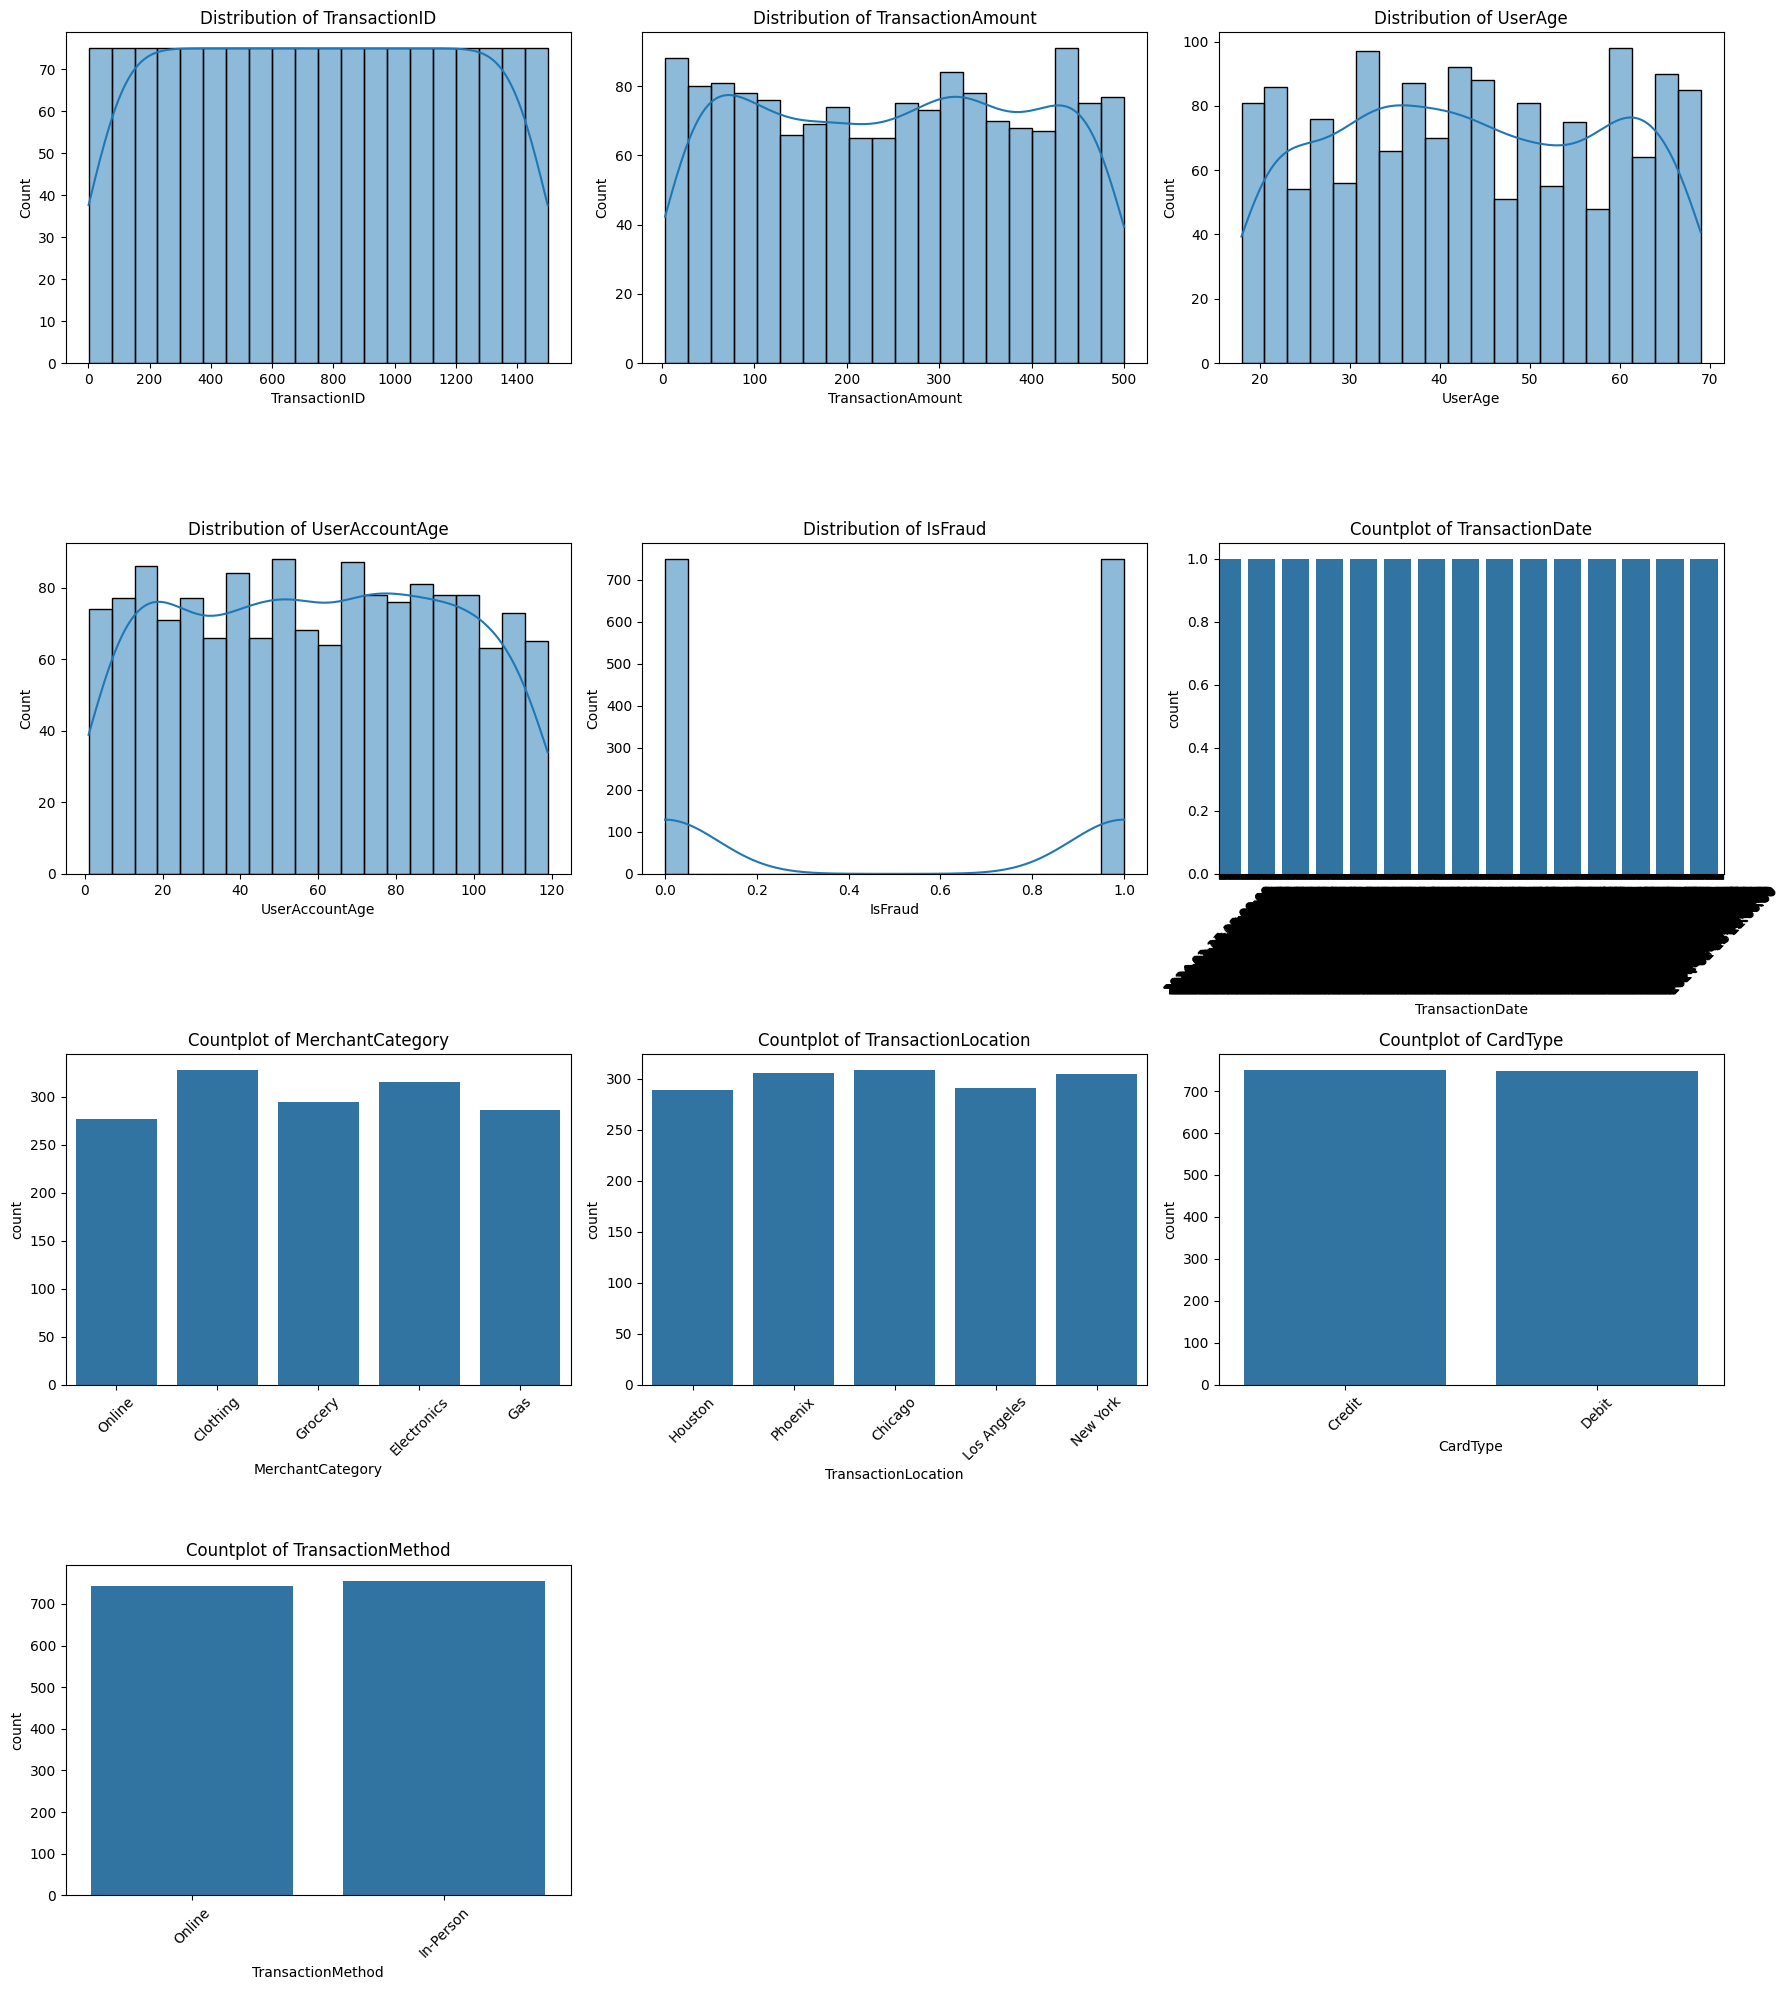

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/ml/credit_card_fraud_detection.csv'
df = pd.read_csv(file_path)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

num_cols = len(numerical_cols)
cat_cols = len(categorical_cols)
total_cols = num_cols + cat_cols
rows = (total_cols // 3) + (total_cols % 3 > 0)

fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for i, col in enumerate(categorical_cols, start=num_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



X = df.drop('IsFraud', axis=1)
y = df['IsFraud']



categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
X = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.97
Precision: 0.99
Recall: 0.95
F1-score: 0.97
Confusion Matrix:
[[159   1]
 [  7 133]]


In [8]:
fraud_distribution = df['IsFraud'].value_counts()
print(fraud_distribution)

IsFraud
1    750
0    750
Name: count, dtype: int64
